In [1]:
from math import log, exp, log10
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# equation definition for steady creep and brittle failure, as well as a function to return min value of those for a given mineral and depth

gas_constant = 8.3

def steady_creep(strain_rate, abs_temp, A, Q, n):
    return ((strain_rate/A)**(1/n)) * exp(Q/(n*gas_constant*abs_temp))

def brittle_failure(depth, B):
    return B * depth

def continental_temperature(depth):
    return 300+(15*depth)

def stress(mineral, depth):
    steady_creep_value = steady_creep(strain_rate=minerals[mineral]["strain_rate"], abs_temp=continental_temperature(depth=depth), A=minerals[mineral]["A"], Q=minerals[mineral]["Q"], n=minerals[mineral]["n"])
    brittle_failure_value = brittle_failure(depth=depth, B=minerals[mineral]["B"])
    return min(steady_creep_value, brittle_failure_value)

#def stress_type(mineral, depth):


In [3]:
# variables for different minerals and depth profile

minerals = {
"wet_quartz" : {
    "Q" : 173_400,
    "n" : 3,
    "A" : 6 * pow(10,-26),
    "B" : 2 * pow(10,7),
    "strain_rate" : pow(10,-15)
},
"dry_olivine" : {
    "Q" : 523000,
    "n" : 3,
    "A" : 2 * pow(10,-12),
    "B" : 2 * pow(10,7),
    "strain_rate" : pow(10,-15)
},
"wet_olivine" : {
    "Q" : 440000,
    "n" : 3,
    "A" : 2 * pow(10,-12),
    "B" : 2 * pow(10,7),
    "strain_rate" : pow(10,-15)
}
}

depth_profile = range(1, 100, 1)

In [4]:
# generates stress-depth profile for minerals of interest

wet_quatz_stress_profile = []
dry_olivine_stress_profile = []
wet_olivine_stress_profile = []

for depth in range(1, 100, 1):
    wet_quatz_stress_profile.append(stress(mineral="wet_quartz", depth=depth))
    dry_olivine_stress_profile.append(stress(mineral="dry_olivine", depth=depth))
    wet_olivine_stress_profile.append(stress(mineral="wet_olivine", depth=depth))

wet_quatz_stress_profile = np.log10(np.array(wet_quatz_stress_profile))
dry_olivine_stress_profile = np.log10(np.array(dry_olivine_stress_profile))
wet_olivine_stress_profile = np.log10(np.array(wet_olivine_stress_profile))

Text(0.5, 0, 'log(stress) / Pa')

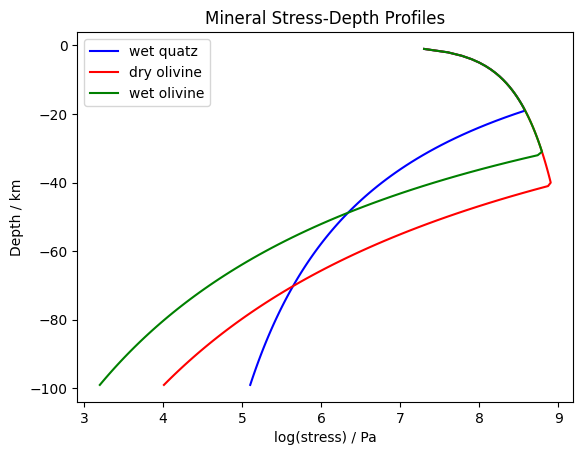

In [5]:
# mineral stress-depth profile graph

fig, ax = plt.subplots()
ax.plot(wet_quatz_stress_profile, range(-1, -100, -1), c = 'b', label="wet quatz")
ax.plot(dry_olivine_stress_profile, range(-1, -100, -1), c = 'r', label="dry olivine")
ax.plot(wet_olivine_stress_profile, range(-1, -100, -1), c = 'g', label="wet olivine")
plt.title("Mineral Stress-Depth Profiles")
plt.legend(loc="upper left")
ax.set_ylabel("Depth / km") 
ax.set_xlabel("log(stress) / Pa")

In [6]:
# generates stress-depth profile for two crustal regions, with transition zones for Moho

oceanic = []
continental = []

for depth in depth_profile:
    if depth < 35:
        continental.append(stress(mineral="wet_quartz", depth=depth))
    else:
        continental.append((stress(mineral="dry_olivine", depth=depth)))

for depth in depth_profile:
    if depth < 5:
        oceanic.append(stress(mineral="wet_quartz", depth=depth))
    else:
        oceanic.append((stress(mineral="dry_olivine", depth=depth)))

oceanic = np.log10(np.array(oceanic))
continental = np.log10(np.array(continental))

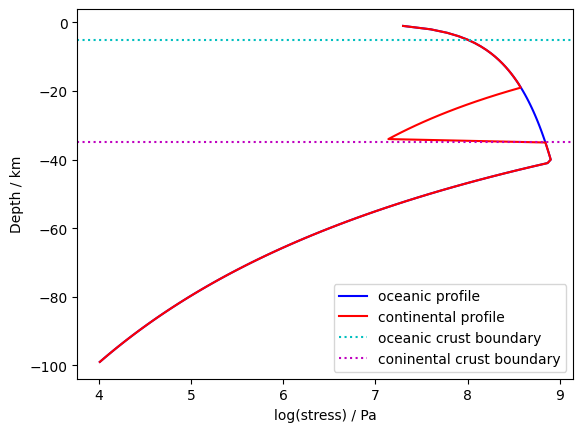

In [7]:
# overall stress-depth profile graph

fig, ax = plt.subplots()
ax.plot(oceanic, range(-1, -100, -1), c = 'b', label="oceanic profile")
ax.plot(continental, range(-1, -100, -1), c = 'r', label="continental profile")
ax.axhline(y=-5, label="oceanic crust boundary", linestyle=":", c="c")
ax.axhline(y=-35, label="coninental crust boundary", linestyle=":", c="m")
ax.set_ylabel("Depth / km") 
ax.set_xlabel("log(stress) / Pa")
plt.legend(loc="lower right")